#**Question 1**

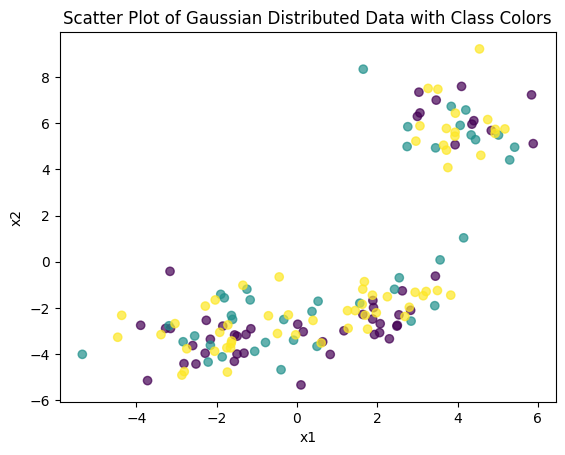

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define means and covariance matrices
mu1 = np.array([2, -2])
mu2 = np.array([4, 6])
mu3 = np.array([-2, -3])

sigma1 = np.array([[1, 0.5], [0.5, 1]])
sigma2 = np.array([[1, -0.3], [-0.3, 1]])
sigma3 = np.array([[1, 0.2], [0.2, 1]])

# Generate data points
D1 = np.random.multivariate_normal(mu1, sigma1, 50)
D2 = np.random.multivariate_normal(mu2, sigma2, 40)
D3 = np.random.multivariate_normal(mu3, sigma3, 60)

# Create class labels
labels_D1 = np.ones(50)
labels_D2 = np.ones(40) * 2
labels_D3 = np.ones(60) * 3

# Combine the datasets
data = np.vstack((D1, D2, D3))
labels = np.hstack((labels_D1, labels_D2, labels_D3))
#print(data)
# Shuffle and remove labels
shuffled_indices = np.random.permutation(len(data))
data = data[shuffled_indices]
#print("after suffle")
#print(data)


plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Gaussian Distributed Data with Class Colors')
plt.show()

#**Question 2**

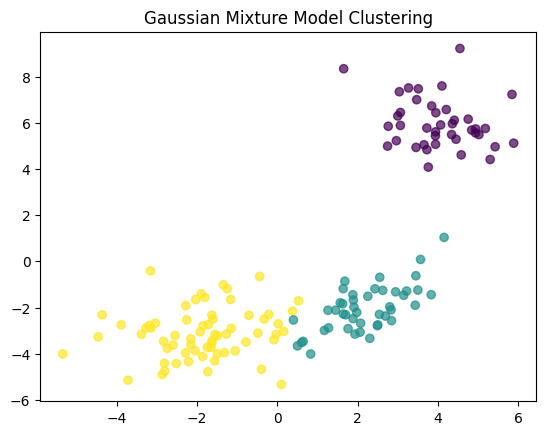

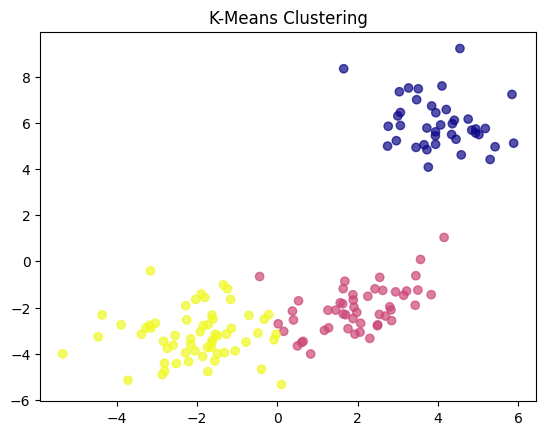

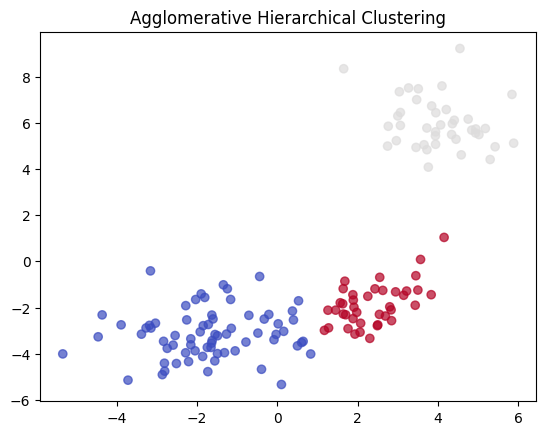

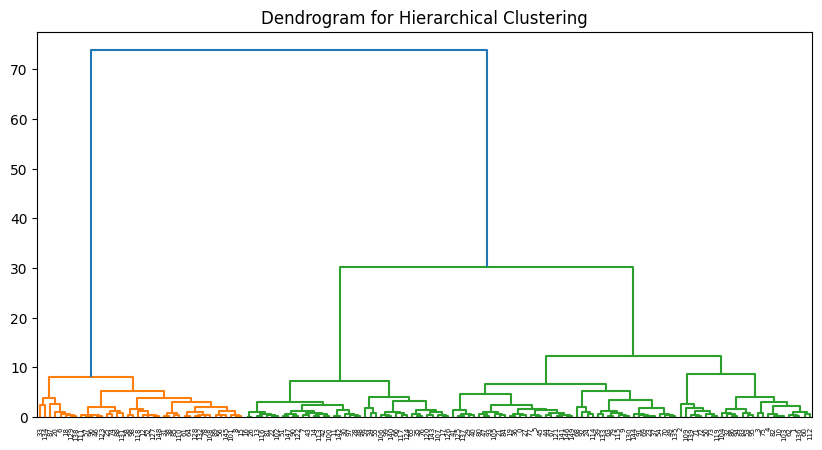

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data)

# Plot GMM clustering results
plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model Clustering')
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

# Plot K-Means clustering results
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='plasma', alpha=0.7)
plt.title('K-Means Clustering')
plt.show()

# Apply Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data)

# Plot Agglomerative Clustering results
plt.scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='coolwarm', alpha=0.7)
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

#**Question 3**

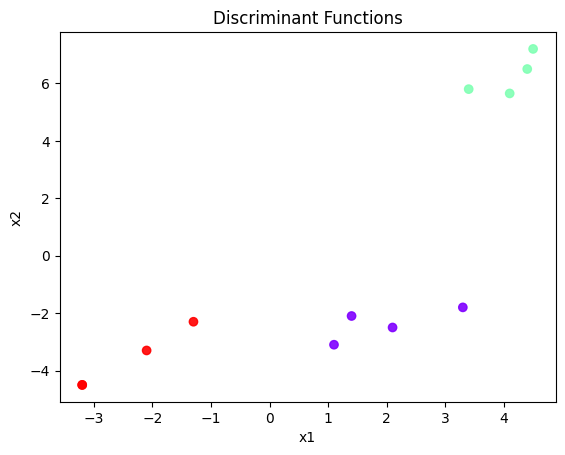

In [ ]:
from scipy.stats import multivariate_normal

# Given dataset
X = np.array([[2.1, -2.5], [1.1, -3.1], [1.4, -2.1], [3.3, -1.8],
              [4.4, 6.5], [3.4, 5.8], [4.5, 7.2], [4.1, 5.65],
              [-1.3, -2.3], [-3.2, -4.5], [-3.2, -4.5], [-2.1, -3.3]])
labels = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

# Compute overall mean and class means
mu = np.mean(X, axis=0)
mu1 = np.mean(X[labels == 1], axis=0)
mu2 = np.mean(X[labels == 2], axis=0)
mu3 = np.mean(X[labels == 3], axis=0)

# Compute covariance matrices
Sigma1 = np.cov(X[labels == 1].T)
Sigma2 = np.cov(X[labels == 2].T)
Sigma3 = np.cov(X[labels == 3].T)

# Given class priors
P_omega1 = 0.4
P_omega2 = 0.35
P_omega3 = 0.25

# Define discriminant function
def discriminant(x, mu, sigma, prior):
    return multivariate_normal.logpdf(x, mean=mu, cov=sigma) + np.log(prior)

# Compute discriminant function values for all points
g1 = [discriminant(x, mu1, Sigma1, P_omega1) for x in X]
g2 = [discriminant(x, mu2, Sigma2, P_omega2) for x in X]
g3 = [discriminant(x, mu3, Sigma3, P_omega3) for x in X]

# Plot the discriminant functions
plt.scatter(X[:, 0], X[:, 1], c=np.argmax([g1, g2, g3], axis=0), cmap='rainbow', alpha=0.9)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Discriminant Functions')
plt.show()
